<a href="https://colab.research.google.com/github/gimhanul/dataAnalysis/blob/master/05_codelab2_urllib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# **해결문제**


공공데이터 포털 사이트에서 한국환경공단_에어코리아_미세먼지 경보 발령 현황 자료를 수집하여 분석하시오.


---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155225 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

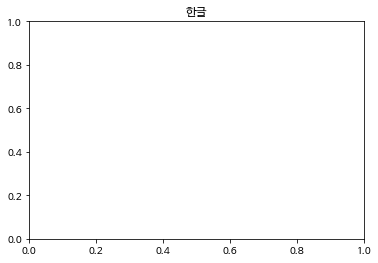

In [8]:
plt.title('한글')
plt.show()

#urllib 모듈
+ URL과 웹 요청에 관련된 모듈들 패키지로 묶어 제공

## urllib.request 모듈
* 웹 페이지 요청 및 데이터를 가져올 수 있음

### urllib.request.urlopen(url, data)
* 웹 서버에 정보를 요청한 후, 돌려받은 응답을 저장하여 ‘**응답 객체(HTTPResponse)**’를 반환
* data는 서버로 전송할 추가 데이터를 지정하는 객체
* 반환된 응답 객체:  read() 메서드를 실행
   - 웹 서버가 응답한 데이터를 바이트 배열로 읽어들임
   - 읽어들인 바이트 배열 : 이진수로 이루어진 수열이어서 **텍스트 형식의 데이터를 decode('utf-8') 메서드를 실행하여 문자열로 변환**

* 참고) **Byte 데이터**
  + 1바이트(0~255사이 코드)로 표현되는 문자 표현
  + 문자열에서 사용하는 연산을 거의 제공
    - 인덱싱/슬라이싱, in, Upper(), Split()
  + 지원 메소드
    - **decode(인코딩값)** : 바이트->문자열로 변환  
    - **encode()** : 문자열->바이트로 변환  


### urllib.request.Request(url, headers={})
* POST방식으로 데이터를 보내려고 할 경우 
  + URL : 요청 주소
  * headers : 딕셔너리형태의 헤더

In [9]:
from urllib.request import Request, urlopen
import json  

+ 공공데이터 포털 : https://www.data.go.kr/

In [ ]:
#접속 URL 생성
url = "http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=f5eef3421c602c6cb7ea224104795888&targetDt=20220103"
url

'http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=f5eef3421c602c6cb7ea224104795888&targetDt=20220103'

In [ ]:
#요청
response = urlopen(url)

In [ ]:
response 

In [ ]:
response.read().decode('utf-8')

'{"boxOfficeResult":{"boxofficeType":"일별 박스오피스","showRange":"20220103~20220103","dailyBoxOfficeList":[{"rnum":"1","rank":"1","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20210028","movieNm":"스파이더맨: 노 웨이 홈","openDt":"2021-12-15","salesAmt":"667909720","salesShare":"62.5","salesInten":"-1649563350","salesChange":"-71.2","salesAcc":"61641856910","audiCnt":"66799","audiInten":"-158578","audiChange":"-70.4","audiAcc":"6141100","scrnCnt":"1985","showCnt":"6840"},{"rnum":"2","rank":"2","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20194403","movieNm":"킹스맨: 퍼스트 에이전트","openDt":"2021-12-22","salesAmt":"231886460","salesShare":"21.7","salesInten":"-489853890","salesChange":"-67.9","salesAcc":"7971389280","audiCnt":"23748","audiInten":"-46491","audiChange":"-66.2","audiAcc":"800139","scrnCnt":"861","showCnt":"2459"},{"rnum":"3","rank":"3","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20217807","movieNm":"해피 뉴 이어","openDt":"2021-12-29","salesAmt":"96467670","salesShare":"9.0","salesInten"

In [ ]:
# 요청에 대한 응답처리
resp = response.read().decode('utf-8')
print(resp)
print(type(resp))

{"boxOfficeResult":{"boxofficeType":"일별 박스오피스","showRange":"20220103~20220103","dailyBoxOfficeList":[{"rnum":"1","rank":"1","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20210028","movieNm":"스파이더맨: 노 웨이 홈","openDt":"2021-12-15","salesAmt":"667909720","salesShare":"62.5","salesInten":"-1649563350","salesChange":"-71.2","salesAcc":"61641856910","audiCnt":"66799","audiInten":"-158578","audiChange":"-70.4","audiAcc":"6141100","scrnCnt":"1985","showCnt":"6840"},{"rnum":"2","rank":"2","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20194403","movieNm":"킹스맨: 퍼스트 에이전트","openDt":"2021-12-22","salesAmt":"231886460","salesShare":"21.7","salesInten":"-489853890","salesChange":"-67.9","salesAcc":"7971389280","audiCnt":"23748","audiInten":"-46491","audiChange":"-66.2","audiAcc":"800139","scrnCnt":"861","showCnt":"2459"},{"rnum":"3","rank":"3","rankInten":"0","rankOldAndNew":"OLD","movieCd":"20217807","movieNm":"해피 뉴 이어","openDt":"2021-12-29","salesAmt":"96467670","salesShare":"9.0","salesInten":

In [ ]:
jsonResp = json.loads(resp) 
type(jsonResp)

dict

In [ ]:
items = jsonResp['boxOfficeResult']['dailyBoxOfficeList']

In [ ]:
print(jsonResp['boxOfficeResult']['showRange'])
for i in items:
  print(i['rank']+"위 "+i['movieNm'])

20220103~20220103
1위 스파이더맨: 노 웨이 홈
2위 킹스맨: 퍼스트 에이전트
3위 해피 뉴 이어
4위 매트릭스: 리저렉션
5위 드라이브 마이 카
6위 신데렐라 2: 마법에 걸린 왕자
7위 엔칸토: 마법의 세계
8위 램
9위 괴짜들의 로맨스
10위 씽2게더


In [ ]:
items[0]

{'audiAcc': '6141100',
 'audiChange': '-70.4',
 'audiCnt': '66799',
 'audiInten': '-158578',
 'movieCd': '20210028',
 'movieNm': '스파이더맨: 노 웨이 홈',
 'openDt': '2021-12-15',
 'rank': '1',
 'rankInten': '0',
 'rankOldAndNew': 'OLD',
 'rnum': '1',
 'salesAcc': '61641856910',
 'salesAmt': '667909720',
 'salesChange': '-71.2',
 'salesInten': '-1649563350',
 'salesShare': '62.5',
 'scrnCnt': '1985',
 'showCnt': '6840'}

2020년 12월 1일~2020년 12월 31일까지 만들기

In [25]:
def mvAPI(dt):
  url = "http://kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.json?key=f5eef3421c602c6cb7ea224104795888&targetDt="
  url = url+str(dt)

  resp = urlopen(url).read().decode('utf-8')
  jsonResp = json.loads(resp)

  showRange = jsonResp['boxOfficeResult']['showRange']
  day = showRange[:4] + '-' + showRange[4:6] + '-' + showRange[6:8]
  info = ''
  for i in jsonResp['boxOfficeResult']['dailyBoxOfficeList']:
    info = info + f"{ day },{ i['rank'] },{ i['movieNm'] },{ i['audiCnt'] },{ i['audiAcc'] }\n"

  return info

with open('/content/drive/MyDrive/datathon/class/data/mv.csv', 'w') as fp:
  fp.write('일자,순위,영화명,일관객수,누적관객수\n')

with open('/content/drive/MyDrive/datathon/class/data/mv.csv', 'a') as fp:
  date = 20211201
  while(date<20211232):
    data = mvAPI(date)
    print(data)
    fp.write(data)
    date += 1


2021-12-01,1,유체이탈자,28158,468281
2021-12-01,2,연애 빠진 로맨스,20372,275782
2021-12-01,3,고스트버스터즈 라이즈,20063,20608
2021-12-01,4,엔칸토: 마법의 세계,14353,316689
2021-12-01,5,라스트 나잇 인 소호,10291,10655
2021-12-01,6,듄,8817,1443342
2021-12-01,7,태일이,8121,67584
2021-12-01,8,귀멸의 칼날: 주합회의·나비저택 편,5234,5234
2021-12-01,9,이터널스,4625,3003717
2021-12-01,10,장르만 로맨스,3382,487203

2021-12-02,1,유체이탈자,25597,493878
2021-12-02,2,연애 빠진 로맨스,18660,294442
2021-12-02,3,엔칸토: 마법의 세계,13484,330173
2021-12-02,4,고스트버스터즈 라이즈,11901,32509
2021-12-02,5,듄,7977,1451319
2021-12-02,6,라스트 나잇 인 소호,7237,17892
2021-12-02,7,태일이,4516,72100
2021-12-02,8,이터널스,3821,3007538
2021-12-02,9,장르만 로맨스,3729,490932
2021-12-02,10,뱅드림! 필름 라이브 세컨드 스테이지,2347,19943

2021-12-03,1,유체이탈자,29150,523028
2021-12-03,2,연애 빠진 로맨스,21918,316360
2021-12-03,3,엔칸토: 마법의 세계,16199,346372
2021-12-03,4,고스트버스터즈 라이즈,10969,43478
2021-12-03,5,듄,10296,1461615
2021-12-03,6,라스트 나잇 인 소호,4865,22757
2021-12-03,7,이터널스,4715,3012253
2021-12-03,8,태일이,3728,75828
2021-12-03,9,장르만 로맨스,3623,494555
2021-12-0

# 파일(File)
## **파일 생성**
+ 파일 객체 = open(파일 이름, 파일 열기 모드, encoding='UTF-8’)
 - 한글이 포함된 파일 입력시 UnicodeDecodeError 에러가 발생하면 encoding 값을 'cp949' 사용

+ 파일 열기 모드
 - r	읽기모드 - 파일을 읽기만 할 때 사용
 - w	쓰기모드 - 파일에 내용을 쓸 때 사용
 - a	추가모드 - 파일의 마지막에 새로운 내용을 추가 시킬 때 사용


## **파일입력 메소드**
+ 파일객체.readline(): 파일의 첫 번째 줄을 읽어 출력하는 경우
+ 파일객체.readlines(): 파일의 모든 라인을 읽어서 각각의 줄을 요소로 갖는 리스트로 리턴
+ 파일객체.read(): 파일의 내용 전체를 문자열로 리턴


## **파일출력 메소드**
+ 파일객체.write()


## with…as 
+ **파일을 open한 후 with…as 구문이 끝나면 자동으로 close**
```
with open(파일 경로, 모드) as 파일 객체:
```

In [9]:
import pandas as pd 

In [2]:
#자료 불러오기 
df = pd.read_csv('/content/drive/MyDrive/datathon/class/data/mv.csv', engine='python', encoding='utf-8')
df.head()

,일자,순위,영화명,일관객수,누적관객수
0,2021-12-01,1,유체이탈자,28158,468281
1,2021-12-01,2,연애 빠진 로맨스,20372,275782
2,2021-12-01,3,고스트버스터즈 라이즈,20063,20608
3,2021-12-01,4,엔칸토: 마법의 세계,14353,316689
4,2021-12-01,5,라스트 나잇 인 소호,10291,10655


In [3]:
df['일관객수'].max()
df[df['일관객수'] == df['일관객수'].max()]

,일자,순위,영화명,일관객수,누적관객수
180,2021-12-19,1,스파이더맨: 노 웨이 홈,682493,2769855


In [6]:
df['일자'] = pd.to_datetime(df['일자'])
df.info()

df['요일'] = df['일자'].dt.weekday
print(df['요일'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      310 non-null    datetime64[ns]
 1   순위      310 non-null    int64         
 2   영화명     310 non-null    object        
 3   일관객수    310 non-null    int64         
 4   누적관객수   310 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 12.2+ KB
0      2
1      2
2      2
3      2
4      2
      ..
305    4
306    4
307    4
308    4
309    4
Name: 요일, Length: 310, dtype: int64


In [8]:
import seaborn as sns

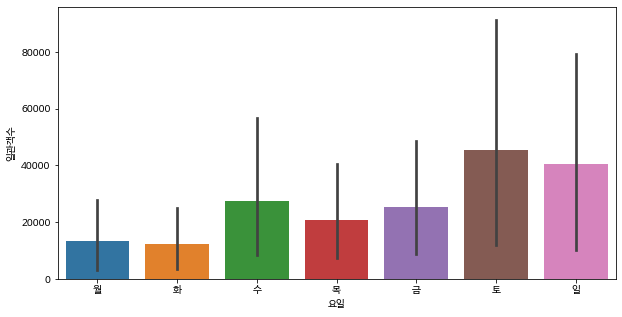

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x='요일', y='일관객수', data=df)
plt.xticks(range(7), labels=['월', '화', '수', '목', '금', '토', '일'])
plt.show()

In [12]:
df.groupby('영화명').mean()[['일관객수']].sort_values('일관객수', ascending=False).head()

,일관객수
영화명,
스파이더맨: 노 웨이 홈,326983.117647
킹스맨: 퍼스트 에이전트,62141.100000
해피 뉴 이어,28468.500000
매트릭스: 리저렉션,17381.727273
유체이탈자,16003.173913


In [14]:
df.groupby('요일').mean()[['일관객수']]

,일관객수
요일,
0,13197.975
1,12192.625
2,27603.040
3,20873.020
4,25464.340
5,45586.475
6,40345.925
